In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys
import random

import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib

In [2]:
# Check Python & Tensorflow version
# 檢查 Tensorflow 和 Python 版本

print("Tensorflow version: {}".format(tf.__version__))
print("Python version: {}".format(sys.version))

Tensorflow version: 2.2.0-rc2
Python version: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [3]:
# Check GPU & CPU usage
# 檢查 GPU 和 CPU 使用

def test_device():
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"
    cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
    gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
    print('GPU Info')
    for gpu in gpus:
        print('   ', gpu)
    print('CPU Info')
    for cpu in cpus:
        print('   ', cpu)
    
    print()
    if gpus:
        try:
            tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
            tf.config.experimental.set_memory_growth(gpus[0], True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
        except RuntimeError as e:
            print(e)
        
test_device()
tf.keras.backend.clear_session()  

GPU Info
    PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
CPU Info
    PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

1 Physical GPUs, 1 Logical GPU


In [4]:
# Download or load MNIST dataset using tf.keras.datasets API
# Store path: ~/.keras/datasets/mnist.npz
# 使用 tf.keras.datasets API 下載或載入 MNIST 資料集
# 資料集存放路徑為 ~/.keras/datasets/mnist.npz

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
# Print MNIST dataset informations
# 打印 MNIST 資料集相關資訊

print("Images numbers:\n"
        "     Train: {}\n"
        "     Test : {}".format(x_train.shape[0], x_test.shape[0]))
print("Image size: {} * {}".format(x_train.shape[1:][0], x_train.shape[1:][1]))

Images numbers:
     Train: 60000
     Test : 10000
Image size: 28 * 28


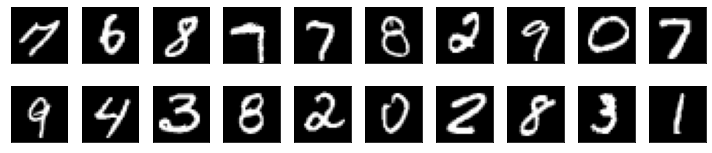

In [6]:
# Show MNIST Examples, Resize to 10 * 10
# 展示部分 MNIST 資料集, 縮放至 10 * 10

example_num = 20
plt.figure(figsize=(10, 10))
for i in range(0, example_num):
    plt.subplot(9,10,i + 1)
    plt.imshow(random.choice(x_train), cmap ='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [7]:
# Define a simple sequential DNN model using tf.keras API
# 用 tf.keras.models API 定義一個爆炸簡單的 DNN 模型
# More informations: https://www.tensorflow.org/api_docs/python/tf/keras

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train model defined aboved
# 我們訓練它.jpg

model.fit(x_train, y_train, epochs=5, verbose=0)
loss, metric = model.evaluate(x_test,  y_test, verbose=1)
print("Loss: {}, Accuracy: {}".format(loss, metric))

313/313 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.9345
Loss: 0.28136417269706726, Accuracy: 0.934499979019165


In [9]:
# Save the trained model with SavedModel format for serving
# 如果選擇 TFServing server 來部署模型，必須使用 SavedModel 格式。
# More informations: https://www.tensorflow.org/guide/saved_model

path = './models/mnist'
var = 1
tf.saved_model.save(model, ''.join([path, str(var)]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model/mnist/1/assets
